In [30]:
import matplotlib
matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
matplotlib.rcParams.update(pgf_with_rc_fonts)
%matplotlib inline
import matplotlib.pyplot as plt

import os.path
import pandas as pd
import cPickle as pkl

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", l

In [2]:
homedir = r'/home/martin/git/TRSL/results'

In [3]:
runs = [
    r'updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah, initiation rates scaled by 0.01_20180221_1409_200000_ribosomes_1800s.p',
    r'updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah, initiation rates scaled by 0.1_20180221_1629_200000_ribosomes_1800s.p',
    r'updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah, initiation rates scaled by 1.0_20180221_2154_200000_ribosomes_1800s.p',
    r'updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah, initiation rates scaled by 10.0_20180222_0414_200000_ribosomes_1800s.p',
    r'updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah, initiation rates scaled by 100.0_20180222_0845_200000_ribosomes_1800s.p'
    ]

The scaling factors I used in the simulation:

In [4]:
scales = [0.01, 0.1, 1.0, 10.0, 100.0]

Remove numpypy dependence:

In [5]:
from tempfile import mkstemp
from shutil import move
from os import remove, close

def replace(file_path, pattern, subst):
    #Create temp file
    fh, abs_path = mkstemp()
    with open(abs_path, 'w') as new_file:
        with open(file_path) as old_file:
            for line in old_file:
                new_file.write(line.replace(pattern, subst))
    close(fh)
    #Remove original file
    remove(file_path)
    #Move new file
    move(abs_path, file_path)

In [6]:
for run in runs:
    print run
    filepath = os.path.join(homedir, run)
    #replace(filepath, "_numpypy.multiarray", "numpy.core.multiarray") # this is needed only once

updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah, initiation rates scaled by 0.01_20180221_1409_200000_ribosomes_1800s.p
updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah, initiation rates scaled by 0.1_20180221_1629_200000_ribosomes_1800s.p
updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah, initiation rates scaled by 1.0_20180221_2154_200000_ribosomes_1800s.p
updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah, initiation rates scaled by 10.0_20180222_0414_200000_ribosomes_1800s.p
updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah, initiation rates scaled by 100.0_20180222_0845_200000_ribosomes_1800s.p


Non-proteins:

In [7]:
blacklist = ['AMP', 'ATP', 'GDP', 'GTP', 
             'peptide_bonds', 'proteins', 'ribos._bound', 'ribos._free', 'tRNA_bound', 'tRNA_free', 
             'tRNA_free_01', 'tRNA_free_02', 'tRNA_free_03', 'tRNA_free_04', 'tRNA_free_05', 'tRNA_free_06', 
             'tRNA_free_07', 'tRNA_free_08', 'tRNA_free_09', 'tRNA_free_10', 'tRNA_free_11', 'tRNA_free_12', 
             'tRNA_free_13', 'tRNA_free_14', 'tRNA_free_15', 'tRNA_free_16', 'tRNA_free_17', 'tRNA_free_18', 
             'tRNA_free_19', 'tRNA_free_20', 'tRNA_free_21', 'tRNA_free_22', 'tRNA_free_23', 'tRNA_free_24', 
             'tRNA_free_25', 'tRNA_free_27', 'tRNA_free_28', 'tRNA_free_29', 'tRNA_free_30', 'tRNA_free_31', 
             'tRNA_free_32', 'tRNA_free_33', 'tRNA_free_34', 'tRNA_free_35', 'tRNA_free_36', 'tRNA_free_37', 
             'tRNA_free_38', 'tRNA_free_39', 'tRNA_free_40', 'tRNA_free_41', 'tRNA_free_42', 'tRNA_free_43']

In [8]:
start, stop, step = 6000, 8999, 0.2

In [9]:
protein_synthesis_rates = pd.DataFrame(columns = scales)

In [10]:
protein_synthesis_rates[0.01]

Series([], Name: 0.01, dtype: object)

In [17]:
for scale, run in zip(scales, runs):
    print scale
    print run
    filepath = os.path.join(homedir, run)
    results = pkl.load(open(filepath))
    print len(results['timecourses'])
    tmp = {gene: (results['timecourses'][gene][-1] - results['timecourses'][gene][-1 - (stop - start)]) / (step * (stop - start)) for gene in results['timecourses'] if gene not in blacklist}
    #tmp_frame = pd.Series(tmp).to_frame(name=scale)
    #pd.merge(protein_synthesis_rates, tmp_frame, how='outer')
    protein_synthesis_rates[scale] = pd.Series(tmp)

0.01
updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah, initiation rates scaled by 0.01_20180221_1409_200000_ribosomes_1800s.p
4429
0.1
updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah, initiation rates scaled by 0.1_20180221_1629_200000_ribosomes_1800s.p
4525
1.0
updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah, initiation rates scaled by 1.0_20180221_2154_200000_ribosomes_1800s.p
4527
10.0
updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah, initiation rates scaled by 10.0_20180222_0414_200000_ribosomes_1800s.p
4527
100.0
updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah, initiation rates scaled by 100.0_20180222_0845_200000_ribosomes_1800s.p
4527


In [18]:
protein_synthesis_rates.head(n=10)

,0.01,0.1,1.0,10.0,100.0
YAL001C,0.003334,0.018339,0.038346,0.065022,0.071691
YAL002W,0.000000,0.005002,0.011671,0.008336,0.023341
YAL003W,3.547849,22.654218,54.239747,63.094365,64.996666
YAL007C,0.061687,0.315105,0.878626,0.980327,1.008670
YAL008W,0.021674,0.105035,0.258419,0.286762,0.301767
YAL009W,0.005002,0.018339,0.036679,0.051684,0.050017
YAL010C,0.001667,0.013338,0.026676,0.041681,0.038346
YAL011W,0.001667,0.008336,0.040013,0.048349,0.051684
YAL012W,0.358453,2.147382,5.106702,6.137046,6.010337
YAL013W,0.003334,0.008336,0.070023,0.081694,0.073358


In [19]:
len(protein_synthesis_rates)

4377

TODO: Why did the outer join not work?

Total synthesis rates:

In [27]:
protein_synthesis_rates_sum = protein_synthesis_rates.sum(axis=0)
protein_synthesis_rates_sum

0.01       391.352117
0.10      2506.968990
1.00      6039.129710
10.00     7132.659220
100.00    7268.371124
dtype: float64

(47.50116705568411, 7612.222074024671)


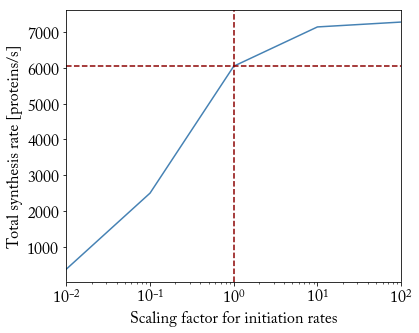

In [42]:
fontsize = 16

fig = plt.figure()

ax = protein_synthesis_rates_sum.plot(logx = True,
                                    figsize = (6, 5),
                                    fontsize = fontsize,
                                    color = 'steelblue')
ax.set_xlabel("Scaling factor for initiation rates", fontsize = fontsize)
ax.set_ylabel("Total synthesis rate [proteins/s]", fontsize = fontsize)


print ax.get_ylim()

ax.axvline(1.0, color='darkred', linestyle='--')
ax.axhline(protein_synthesis_rates_sum[1.0], color='darkred', linestyle='--')

#plt.show()
plt.savefig('TRSL_scaling_initiation_rates.pgf', bbox_inches='tight')